In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from library.sb_utils import save_file
#from dbutils import save_file

### Load the Data

In [2]:
retail_data = pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/data_cleaned.csv')

###### Explore the data

In [3]:
retail_data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,5/2/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2,5/2/2010,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2,1,3,5/2/2010,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
3,1,4,5/2/2010,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
4,1,5,5/2/2010,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
5,1,6,5/2/2010,5749.03,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
6,1,7,5/2/2010,21084.08,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
7,1,8,5/2/2010,40129.01,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
8,1,9,5/2/2010,16930.99,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
9,1,10,5/2/2010,30721.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False


In [4]:
#Check if there are any null values in the data.
retail_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [5]:
retail_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

##### Summary statistics

In [6]:
#Let's find out what the maximun Weekly-sales was .
retail_data.Weekly_Sales.sort_values(ascending=False).head()

90645     693099.36
337053    649770.18
94393     630999.19
333594    627962.93
131088    474330.10
Name: Weekly_Sales, dtype: float64

In [7]:
#Let's calculate the average sales throughout the year
retail_data.Weekly_Sales.mean()

15981.258123467327

In [8]:
#Calculate the median for Weekly sales 
retail_data.Weekly_Sales.median()

7612.03

In [9]:
retail_data.Weekly_Sales.mode()

0    10.0
dtype: float64

In [10]:
#Let's find the minimum Weekly-sales
retail_data.Weekly_Sales.sort_values(ascending=True).head()

269456   -4988.94
336241   -3924.00
412178   -1750.00
155177   -1699.00
271178   -1321.48
Name: Weekly_Sales, dtype: float64

##### Visual Exploratory Analysis

Text(0.5, 0, 'Dept')

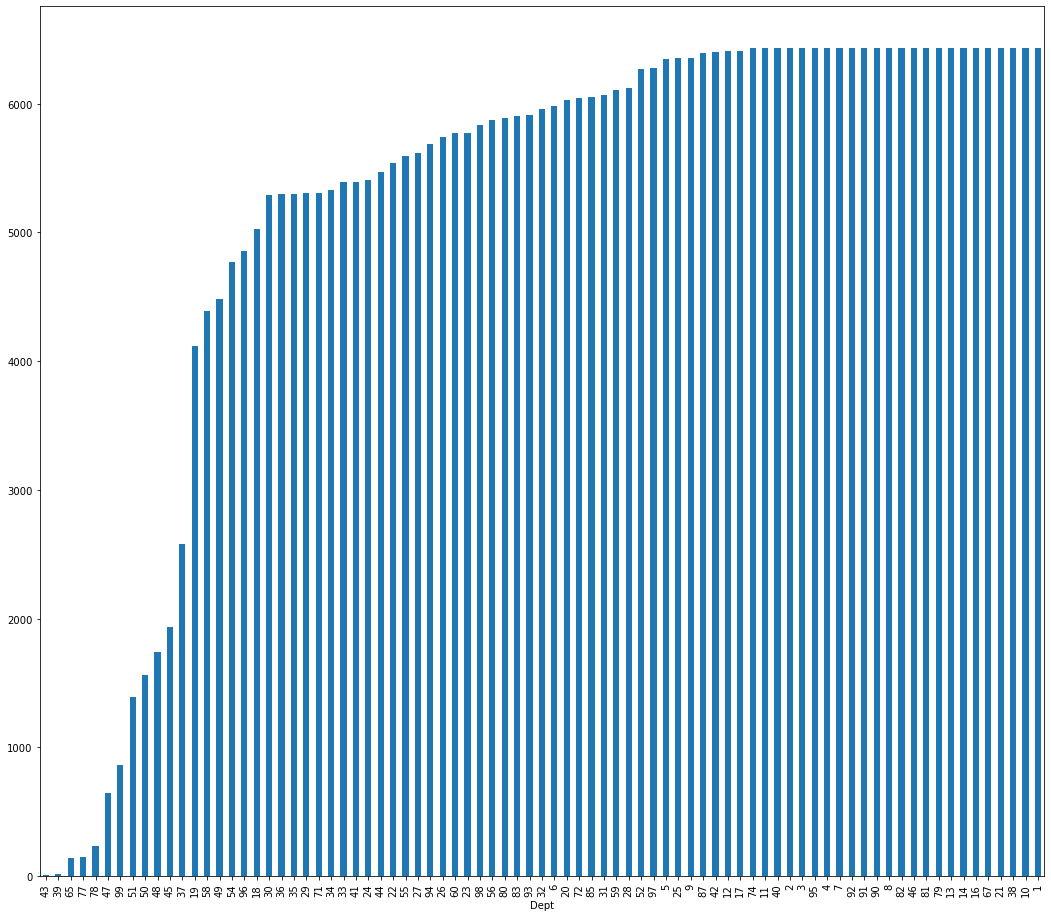

In [13]:
#plotting a bar graph for the entire 'Dept'  column
plt.figure(figsize=(18,16))
retail_data.Dept.value_counts(ascending=True).plot.bar()
#plt.bar(retail_data['Dept'].value_counts())
plt.xlabel('Dept')

In [14]:
#plotting bar graph for only the first 25 rows
#Dept = retail_data['Dept'].head(25)
#values = retail_data.Dept.value_counts().head(25)
#fig = plt.figure(figsize = (16, 12))
#plt.barh(Dept[0:25],values[0:25])

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Date'>

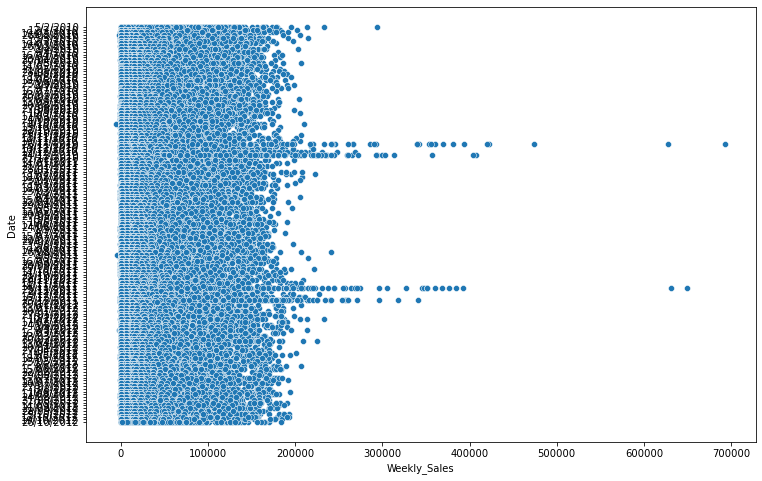

In [15]:
#Let's plot scatter plot
#sns.scatterplot(x='density', y='fixed.acidity', data=wine)
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Date', data=retail_data)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Temperature'>

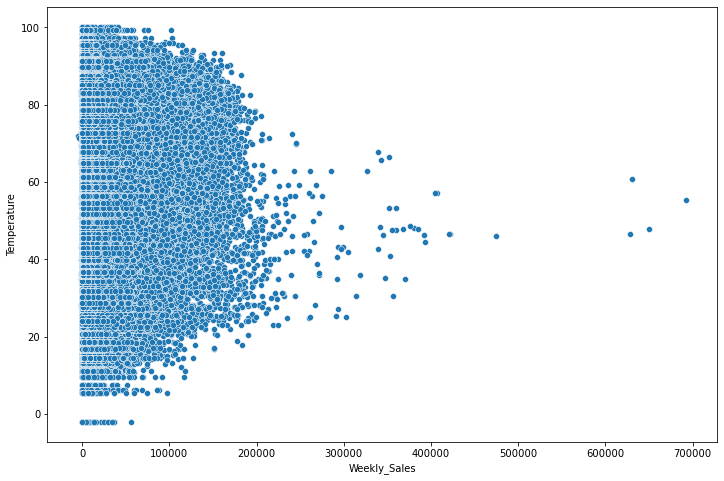

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Temperature', data=retail_data)

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

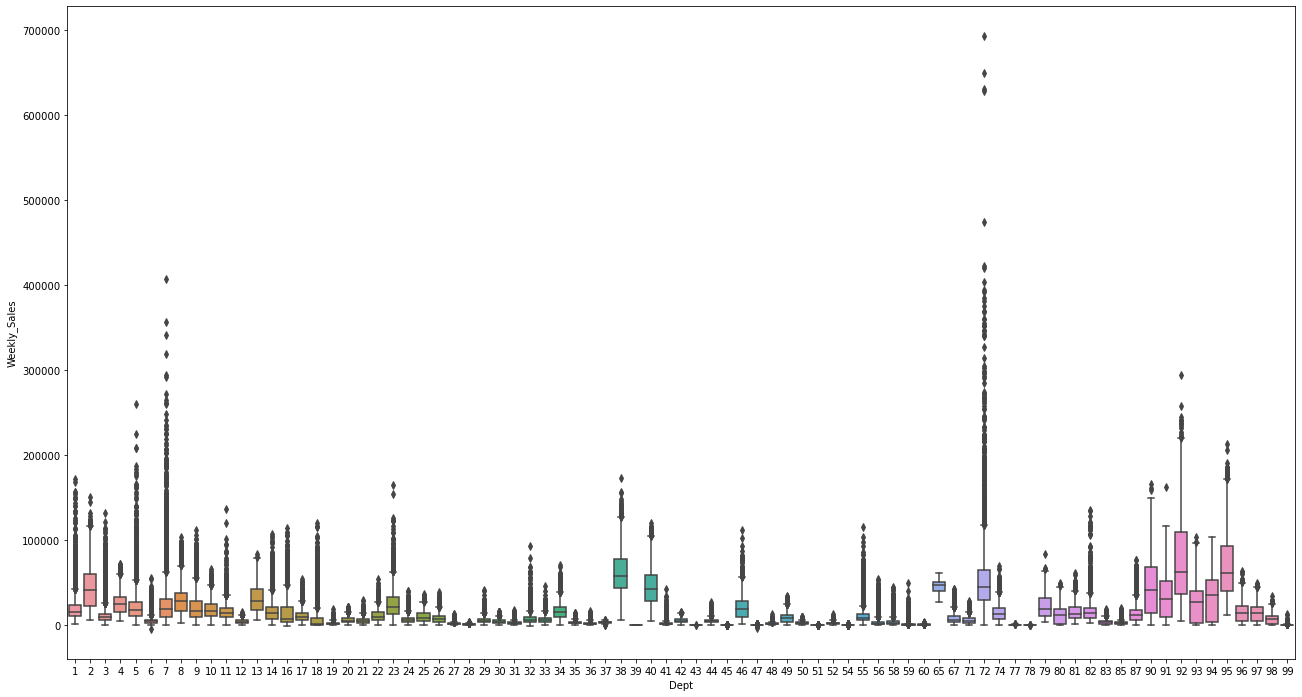

In [19]:
#Let's plot a graph to visualize weekly sales for each department
plt.figure(figsize=(22,12))
sns.boxplot(x='Dept', y='Weekly_Sales', data=retail_data) 

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

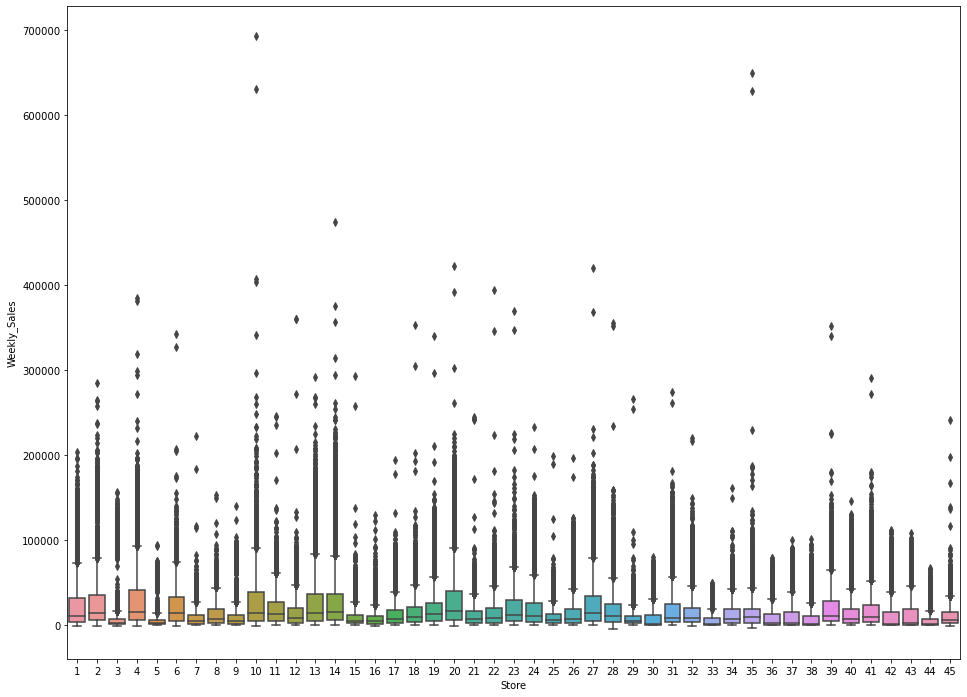

In [20]:
##Let's plot a graph to visualize weekly_sales for each store
plt.figure(figsize=(16,12))
sns.boxplot(x='Store', y='Weekly_Sales', data=retail_data) 

##### Grouping and agrregating 

In [21]:
#let's see what's the Average weekly sales for each individual store
AvgWeeklySales_perStore = retail_data.groupby('Store')['Weekly_Sales'].mean()
AvgWeeklySales_perStore.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [22]:
TotalWeeklySales_perStore = retail_data.groupby('Store')['Weekly_Sales'].sum()
TotalWeeklySales_perStore.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [23]:
#Find out which stores has the highest average weekly_sales
AvgWeeklySales_perStore.nlargest(3)
#https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/

Store
20    29508.301592
4     29161.210415
14    28784.851727
Name: Weekly_Sales, dtype: float64

In [24]:
#Find out the top 3 stores with highest total weekly_sales
TotalWeeklySales_perStore.nlargest(3)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
Name: Weekly_Sales, dtype: float64

In [25]:
#Find out the which stores have least avearge weekly_sales
AvgWeeklySales_perStore.nsmallest(3)

Store
5     5053.415813
33    5728.414053
44    6038.929814
Name: Weekly_Sales, dtype: float64

In [26]:
#Stores that have least total weekly_sales
TotalWeeklySales_perStore.nsmallest(3)

Store
33    37160221.96
44    43293087.84
5     45475688.90
Name: Weekly_Sales, dtype: float64

In [27]:
#retail_data.boxplot(by='AvgWeeklySales_perStore')

In [28]:
#let's calculate the Average weekly sales for each department
#Ref: #state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
#state_avg_price.head()
AvgWeekly_sales_perDept = retail_data.groupby('Dept')['Weekly_Sales'].mean()
AvgWeekly_sales_perDept 

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64

In [29]:
TotalWeekly_sales_perDept = retail_data.groupby('Dept')['Weekly_Sales'].sum()
TotalWeekly_sales_perDept.head()

Dept
1    1.236388e+08
2    2.806112e+08
3    7.589245e+07
4    1.671467e+08
5    1.356074e+08
Name: Weekly_Sales, dtype: float64

In [30]:
#Find out the top 3 departments with highest average weekly_sales
AvgWeekly_sales_perDept.nlargest(3)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
Name: Weekly_Sales, dtype: float64

In [31]:
#Find out the top 3 departments with highest total weekly_sales
TotalWeekly_sales_perDept.nlargest(3)

Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
Name: Weekly_Sales, dtype: float64

In [32]:
#Find out which departments have the lowest weekly_sales
TotalWeekly_sales_perDept.nsmallest(3)

Dept
47   -4962.93
43      14.32
39     177.98
Name: Weekly_Sales, dtype: float64

In [33]:
#Find out which departments have the lowest average weekly_sales
AvgWeekly_sales_perDept.nsmallest(3)

Dept
47   -7.682554
43    1.193333
78    7.296638
Name: Weekly_Sales, dtype: float64

In [34]:
#Refer: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#Convert 'Date' column to 'datetime' format 
retail_data['Date'] = pd.to_datetime(retail_data.Date, dayfirst=True,infer_datetime_format=True)
#Sinceour dataframe has 'Date' column in te format day/month/year ,I have set dayFirst=True. 

In [35]:
#Let's check how it looks
retail_data['Date']

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [36]:
#Now let's sum up the Date (column) according to their month
#retail_data['Date'] = retail_data['Date'].dt.strftime('%d-%m-%Y')
retail_data['Month'] = retail_data['Date'].dt.month
#Refer:https://stackoverflow.com/questions/51102615/get-month-from-date-column?answertab=votes#tab-top
#df['Date'] = pd.to_datetime(df['Date'])
#df['Month'] = df['Date'].dt.month

In [37]:
retail_data.Month

0          2
1          2
2          2
3          2
4          2
          ..
421565    10
421566    10
421567    10
421568    10
421569    10
Name: Month, Length: 421570, dtype: int64

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Month'>

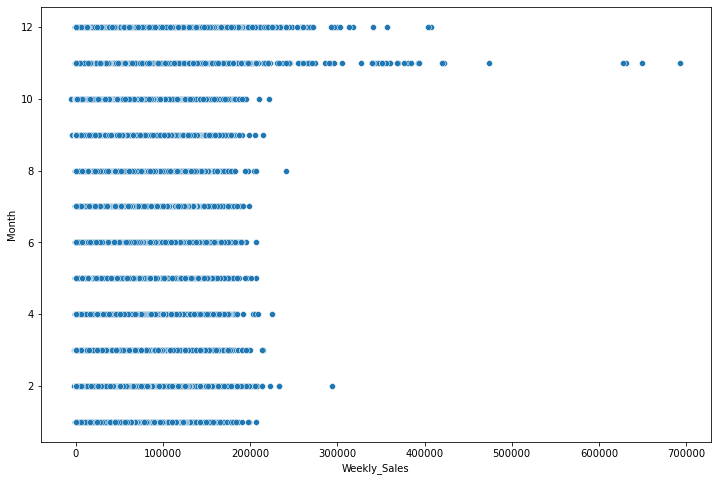

In [38]:
#Let's plot a scatter plot to see weekly_sales for every month.
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Month', data=retail_data) # plot a box plot for this

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

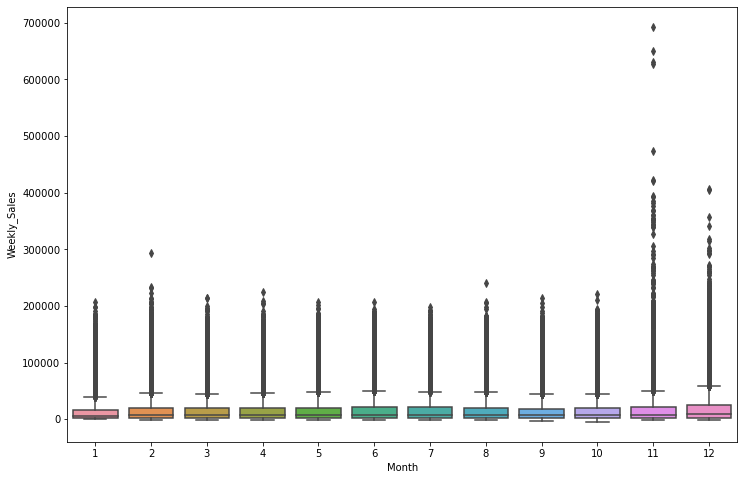

In [39]:
#Box plot for weekly-sales per month
plt.figure(figsize=(12,8))
sns.boxplot(x='Month', y='Weekly_Sales', data=retail_data) 

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

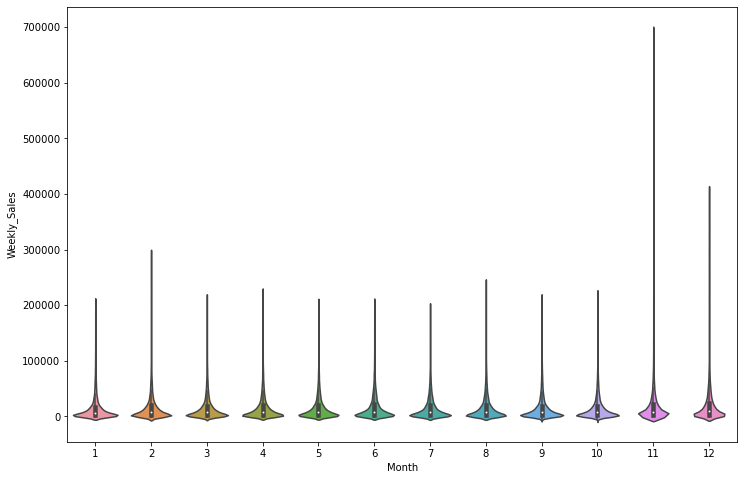

In [40]:
#Violin plot for weekly sales per month
plt.figure(figsize=(12,8))
sns.violinplot(x='Month', y='Weekly_Sales', data=retail_data) # plot a box plot for this

In [41]:
#Calculating the Weekly_sales per month 
TotalMonthly_sales = retail_data.groupby('Month')['Weekly_Sales'].sum()
TotalMonthly_sales

Month
1     3.325984e+08
2     5.687279e+08
3     5.927859e+08
4     6.468598e+08
5     5.571256e+08
6     6.226299e+08
7     6.500010e+08
8     6.130902e+08
9     5.787612e+08
10    5.847848e+08
11    4.130157e+08
12    5.768386e+08
Name: Weekly_Sales, dtype: float64

In [42]:
#let's also find the average weekly_sales per month , since the total is a very big number
AverageMonthly_sales = retail_data.groupby('Month')['Weekly_Sales'].mean()
AverageMonthly_sales    

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [43]:
#Find out the top 3 Months with highest total_sales
TotalMonthly_sales.nlargest(3)

Month
7    6.500010e+08
4    6.468598e+08
6    6.226299e+08
Name: Weekly_Sales, dtype: float64

In [44]:
#Find out the top 3 Months with highest average_sales
AverageMonthly_sales.nlargest(3)

Month
12    19355.702141
11    17491.031424
6     16326.137002
Name: Weekly_Sales, dtype: float64

In [45]:
#Months with lowest sales
TotalMonthly_sales.nsmallest(3)

Month
1     3.325984e+08
11    4.130157e+08
5     5.571256e+08
Name: Weekly_Sales, dtype: float64

In [46]:
#Months with lowest average sales
AverageMonthly_sales.nsmallest(3)

Month
1     14126.075111
9     15095.886154
10    15243.855576
Name: Weekly_Sales, dtype: float64

In [47]:
#(ski_data[ski_data.Region != ski_data.state]
 #.groupby('state')['Region']
 #.value_counts())
(retail_data[retail_data.Weekly_Sales== 0].groupby('Month')['Weekly_Sales'].value_counts())

Month  Weekly_Sales
1      0.0              8
2      0.0              9
3      0.0              6
4      0.0              8
5      0.0              4
6      0.0              8
7      0.0              6
8      0.0             11
9      0.0              5
10     0.0              4
11     0.0              2
12     0.0              2
Name: Weekly_Sales, dtype: int64

In [48]:
retail_data.Month.value_counts()

4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: Month, dtype: int64

##### Add these derived features to our retail_data dataframe. 

In [49]:
#AvgWeeklySales_perStore = retail_data.groupby('Store')['Weekly_Sales'].mean()

In [50]:
AvgWeeklySales_perStore.rename('AvgWeeklySalesperStore', inplace=True)

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: AvgWeeklySalesperStore, dtype: float64

In [51]:
retail_data= retail_data.merge(AvgWeeklySales_perStore, how='left', left_on='Store',right_index=True)

In [52]:
AvgWeekly_sales_perDept.rename('AvgWeeklySalesperDept',inplace=True)

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: AvgWeeklySalesperDept, Length: 81, dtype: float64

In [53]:
retail_data= retail_data.merge(AvgWeekly_sales_perDept, how='left', left_on='Dept',right_index=True)

In [54]:
AverageMonthly_sales.rename('AverageMonthlySales', inplace=True)

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: AverageMonthlySales, dtype: float64

In [55]:
retail_data= retail_data.merge(AverageMonthly_sales, how='left', left_on='Month',right_index=True)

In [56]:
retail_data.head(100)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,AvgWeeklySalesperStore,AvgWeeklySalesperDept,AverageMonthlySales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,19213.485088,16008.779217
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,43607.020113,16008.779217
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,11793.698516,16008.779217
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,25974.630238,16008.779217
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,21365.583515,16008.779217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,24,2010-02-12,8050.24,True,A,151315,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,True,2,21710.543621,6353.604562,16008.779217
96,1,25,2010-02-12,13268.75,True,A,151315,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,True,2,21710.543621,8988.230818,16008.779217
97,1,26,2010-02-12,10050.92,True,A,151315,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,True,2,21710.543621,7649.417947,16008.779217
98,1,27,2010-02-12,2339.50,True,A,151315,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,True,2,21710.543621,1583.437727,16008.779217


In [57]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='Weekly_Sales', y='MarkDown1', data=retail_data) # plot a box plot for this

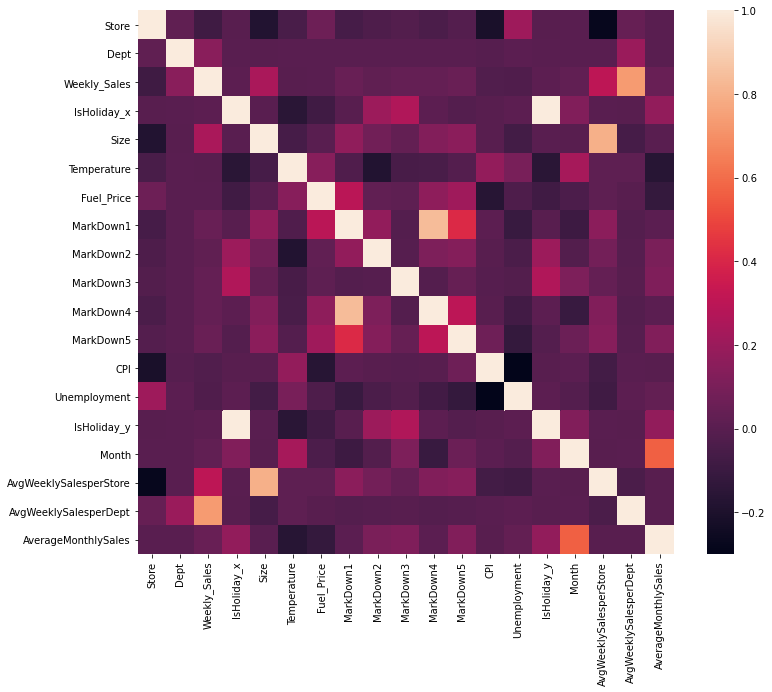

In [58]:
#Show a seaborn heatmap of correlations in retail_data
#call pandas' `corr()` method on `retail_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(retail_data.corr());

In [59]:
retail_data.dtypes

Store                              int64
Dept                               int64
Date                      datetime64[ns]
Weekly_Sales                     float64
IsHoliday_x                         bool
Type                              object
Size                               int64
Temperature                      float64
Fuel_Price                       float64
MarkDown1                        float64
MarkDown2                        float64
MarkDown3                        float64
MarkDown4                        float64
MarkDown5                        float64
CPI                              float64
Unemployment                     float64
IsHoliday_y                         bool
Month                              int64
AvgWeeklySalesperStore           float64
AvgWeeklySalesperDept            float64
AverageMonthlySales              float64
dtype: object

##### Save the data 

In [60]:
#datapath = '/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/data_cleaned.csv'
#save_file(retail_data, 'retail_data_eda.csv', datapath)

In [61]:
#retail_data.to_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/retail_data_eda.csv')